# Лабораторная работа 3. Итеративные и рекурсивные алгоритмы

## Вариант 11

## Задание

Реализуйте алгоритм вычисления суммы с использованием рекурсии и без рекурсии
y(x,i) = \sin x + \sin(\sin x) + \ldots + \sin(\sin \ldots (\sin x)), \qquad i = 1,2,\ldots, n

## Реализация алгоритма с рекурсией

In [26]:
import math

def RecursiveSum(x, i):
    if i == 0:
        return 0
    result = math.sin(x) + RecursiveSum(math.sin(x), i - 1)
    return result

print(RecursiveSum(2, 3))
print(RecursiveSum(2, 10))
print(RecursiveSum(3, 15))

2.408069810633096
6.252928681402473
2.069677852982532


## Реализация алгоритма без рекурсии 

In [27]:
def IterativeSum(x, i):
    result = 0
    for j in range(i):
        result += math.sin(x)
        x = math.sin(x)
    return result

print(IterativeSum(2, 3))
print(IterativeSum(2, 10))
print(IterativeSum(3, 15))

2.408069810633096
6.252928681402473
2.0696778529825317


## Блок схема рекурсивного алгоритма

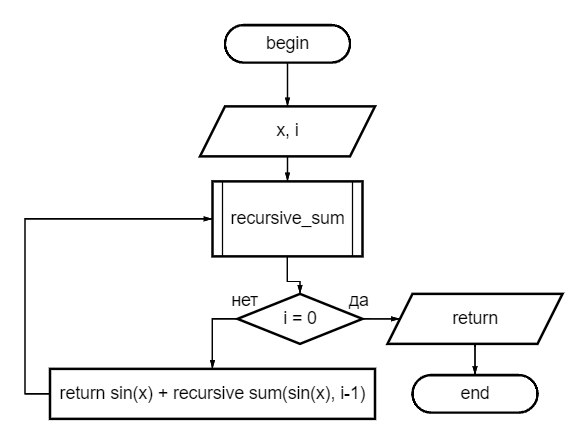

In [28]:
from IPython.display import Image
Image(filename='Desktop/recursed.jpg')

## Блок схема алгоритма без рекурсии

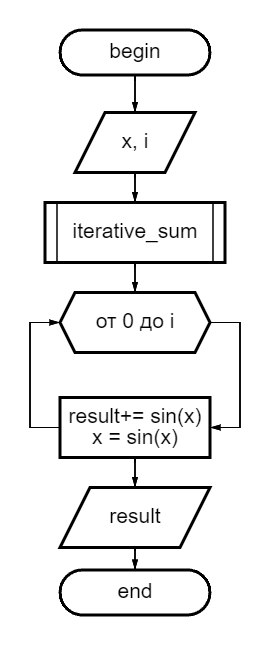

In [29]:
from IPython.display import Image
Image(filename='Desktop/cyclo.jpg')

### Оценка верхней границы переполнения стека

Мой рекурсивный алгоритм, может привести к переполнению стека вызовов, если i очень большое число, так как для каждого i происходит новый вызов функции и занимается новый участок стека. В данном случае переполнение стека зависит от доступной памяти и размера стека вызовов. Обычно размер стека вызовов составляет несколько мегабайт, поэтому верхняя граница размерности задачи будет зависеть от объема используемой памяти на один вызов функции и многих других факторов, поэтому конкретное значение тяжело вычислить




## Реализация сохранения промежуточных результатов вручную

In [57]:
import math

def MemoSum(x, i, cache={}):
    if i == 0:
        return 0
    elif i in cache:
        return cache[i]
    else:
        result = math.sin(x) + MemoSum(math.sin(x), i-1)
        cache[i] = result
        return result


print(MemoSum(2, 3))

2.408069810633096


## Реализация сохранения промежуточных результатов при помощи @memoized 

In [49]:
def memoized(fn):
    cache = {}
    def wrapped(*args):
        if args in cache:
            return cache[args]
        result = fn(*args)
        cache[args] = result
        return result
    return wrapped

@memoized
def MemoizedSum(x, i):
    if i == 0:
        return 0
    else:
        return math.sin(x) + MemoizedSum(math.sin(x), i-1)
    
print(MemoizedSum(2, 3))
print(MemoizedSum(2, 10))
print(MemoizedSum(3, 15))

2.408069810633096
6.252928681402473
2.069677852982532


## Оценка производительности

In [34]:
import time
import math

def RecursiveSum(x, i):
    if i == 0:
        return 0
    else:
        return math.sin(x) + RecursiveSum(math.sin(x), i-1)

start_time = time.time()
result = RecursiveSum(2, 10)
end_time = time.time()

print("Результат: ", result)
print("Времени затрачено :", end_time - start_time)

#####

def MemoSum(x, i, cache={}):
    if i == 0:
        return 0
    elif i in cache:
        return cache[i]
    else:
        result = math.sin(x) + MemoSum(math.sin(x), i-1)
        cache[i] = result
        return result

start_time = time.time()
result = MemoSum(2, 10)
end_time = time.time()

print("Результат: ", result)
print("Времени затрачено: ", end_time - start_time)

#####

def IterativeSum(x, i):
    result = 0
    while i > 0:
        result += math.sin(x)
        x = math.sin(x)
        i -= 1
    return result

start_time = time.time()
result = IterativeSum(2, 10)
end_time = time.time()

print("Результат :", result)
print("Времени затрачено: ", end_time - start_time)

Результат:  6.252928681402473
Времени затрачено : 6.508827209472656e-05
Результат:  6.252928681402473
Времени затрачено:  9.989738464355469e-05
Результат : 6.252928681402473
Времени затрачено:  8.296966552734375e-05


Как видно из результатов, самый быстрый алгоритм - с использованием цикла. Рекурсивный алгоритм с сохранением результатов на втором месте, но рекурсивный алгоритм без сохранения на третьем.